In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./world_energy.csv')
consumptions_year_pop = ['year','population','biofuel_consumption', 'coal_consumption','fossil_fuel_consumption',
                'gas_consumption','hydro_consumption','low_carbon_consumption','nuclear_consumption','oil_consumption',
                'other_renewable_consumption','primary_energy_consumption', 'renewables_consumption','solar_consumption', 
                'wind_consumption']

df_consumption_year_pop = df[consumptions_year_pop] 
X = df_consumption_year_pop.loc[(df_consumption_year_pop['year'] >= 1965) & (df_consumption_year_pop['year'] <= 2019)]

# dropping all NaN
X_withoutNaN = X.dropna(axis=0, inplace=False)

In [3]:
### This section will provide the test instances with the labels as intervals  

# make copy so changes do not affect original data
y = X_withoutNaN.copy()

# Delet every other column except for population
y.drop(X_withoutNaN.columns.difference(['population']), 1, inplace=True)

y = y.to_numpy()

# we used exponential growth to make the population intervals. f(x)=a(1+r)^x, a=50.000, r=0.1, x=10
# intervals = [[0,50000],[50001, 130000], [130000, 337000], [337000, 874000],[874000, 2276000],[2276000, 5880000],[5880000, 15250000],[15250000, 39555000],[39555000, 102595000],[102595000, 266105000],[266105000, 690207000],[690207000, 1790220000],[1790220000, 4643370000],[4643370000, 10000000000]]

# find out hom many instances are left 
amount_of_instances_left = np.shape(y)[0]

yclass = []

for i in range(amount_of_instances_left):
    if(0<= y[i]<=50000) :
        yclass.append(0)
      
    if(50000< y[i]<=130000) :
        yclass.append(1)
      
    if(130000< y[i] <=337000) :
        yclass.append(2)
      
    if(337000< y[i] <=874000) :
        yclass.append(3)
      
    if(874000< y[i]<=2276000) :
        yclass.append(4)
      
    if(2277000< y[i]<=5880000) :
        yclass.append(5)
      
    if(5880000<= y[i]<=15250000) :
        yclass.append(6)
      
    if(15250000< y[i]<=39555000) :
        yclass.append(7)
      
    if(39555000< y[i]<=102595000) :
        yclass.append(8) 
        
    if(102595000< y[i]<=266105000) :
        yclass.append(9)
        
    if(266105000< y[i]<=690207000) :
        yclass.append(10)
      
    if(690207000< y[i]<=1790220000 ) :
        yclass.append(11)
        
    if(1790220000< y[i]<=4643370000) :
        yclass.append(12)
      
    if(4643370000< y[i]<=10000000000) :
        yclass.append(13)
               
y_final = np.array(yclass)

/var/folders/wv/k8gcwxt538q638r1n01l5hh40000gn/T/ipykernel_79495/2142954209.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y.drop(X_withoutNaN.columns.difference(['population']), 1, inplace=True)


In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop population and year, because we only want consumption as predictor
X = X_withoutNaN.drop('population', axis=1, inplace=False)
X = X.drop('year', axis=1, inplace=False)
X = X.reset_index( drop= True, inplace=False)

### First we do training test split, with different depths and different min_sample_size to copmare

# Apply training test split

random_state = 1337
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.33, 
                                                    random_state= random_state, stratify=y_final)

#-----------------------------------------------------------------

curr_depth = 0
depth = np.arange(1,31,1)

list_test_err = []
list_train_err= []

# Optimal depth for min_sample_size= default= 2

for i in range(30):
    
    curr_depth = curr_depth+1

    #Create decision tree object
    dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth)

    #Fit the decision tree to the training data, is correct only training data?
    dtc = dtc.fit(X_train, y_train)

    y_test_pred = dtc.predict(X_test)
    y_train_pred = dtc.predict(X_train)
    
    list_train_err.append(1-accuracy_score(y_train, y_train_pred))
    
    list_test_err.append(1-accuracy_score(y_test, y_test_pred))
    
#-----------------------------------------------------------------

curr_depth = 0

list_test_err_5 = []
list_train_err_5 = []

# Doing the same but with min_samples_split= 5

for i in range(30):
    
    curr_depth = curr_depth+1

    #Create decision tree object
    dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth, min_samples_split=5)

    #Fit the decision tree to the training data, is correct only training data?
    dtc = dtc.fit(X_train, y_train)

    y_test_pred = dtc.predict(X_test)
    y_train_pred = dtc.predict(X_train)
    
    list_train_err_5.append(1-accuracy_score(y_train, y_train_pred))
    
    list_test_err_5.append(1-accuracy_score(y_test, y_test_pred))
    
#-----------------------------------------------------------------

curr_depth = 0

list_test_err_10 = []
list_train_err_10 = []

# Doing the same but with min_samples_split=10

for i in range(30):
    
    curr_depth = curr_depth+1

    #Create decision tree object
    dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth, min_samples_split=10)

    #Fit the decision tree to the training data, is correct only training data?
    dtc = dtc.fit(X_train, y_train)

    y_test_pred = dtc.predict(X_test)
    y_train_pred = dtc.predict(X_train)
    
    list_train_err_10.append(1-accuracy_score(y_train, y_train_pred))
    
    list_test_err_10.append(1-accuracy_score(y_test, y_test_pred))
    
    
#-----------------------------------------------------------------

curr_depth = 0

list_test_err_50 = []
list_train_err_50 = []

# Doing the same but with min_samples_split= 50

for i in range(30):
    
    curr_depth = curr_depth+1

    #Create decision tree object
    dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth, min_samples_split= 50)

    #Fit the decision tree to the training data, is correct only training data?
    dtc = dtc.fit(X_train, y_train)

    y_test_pred = dtc.predict(X_test)
    y_train_pred = dtc.predict(X_train)
    
    list_train_err_50.append(1-accuracy_score(y_train, y_train_pred))
    
    list_test_err_50.append(1-accuracy_score(y_test, y_test_pred))
    


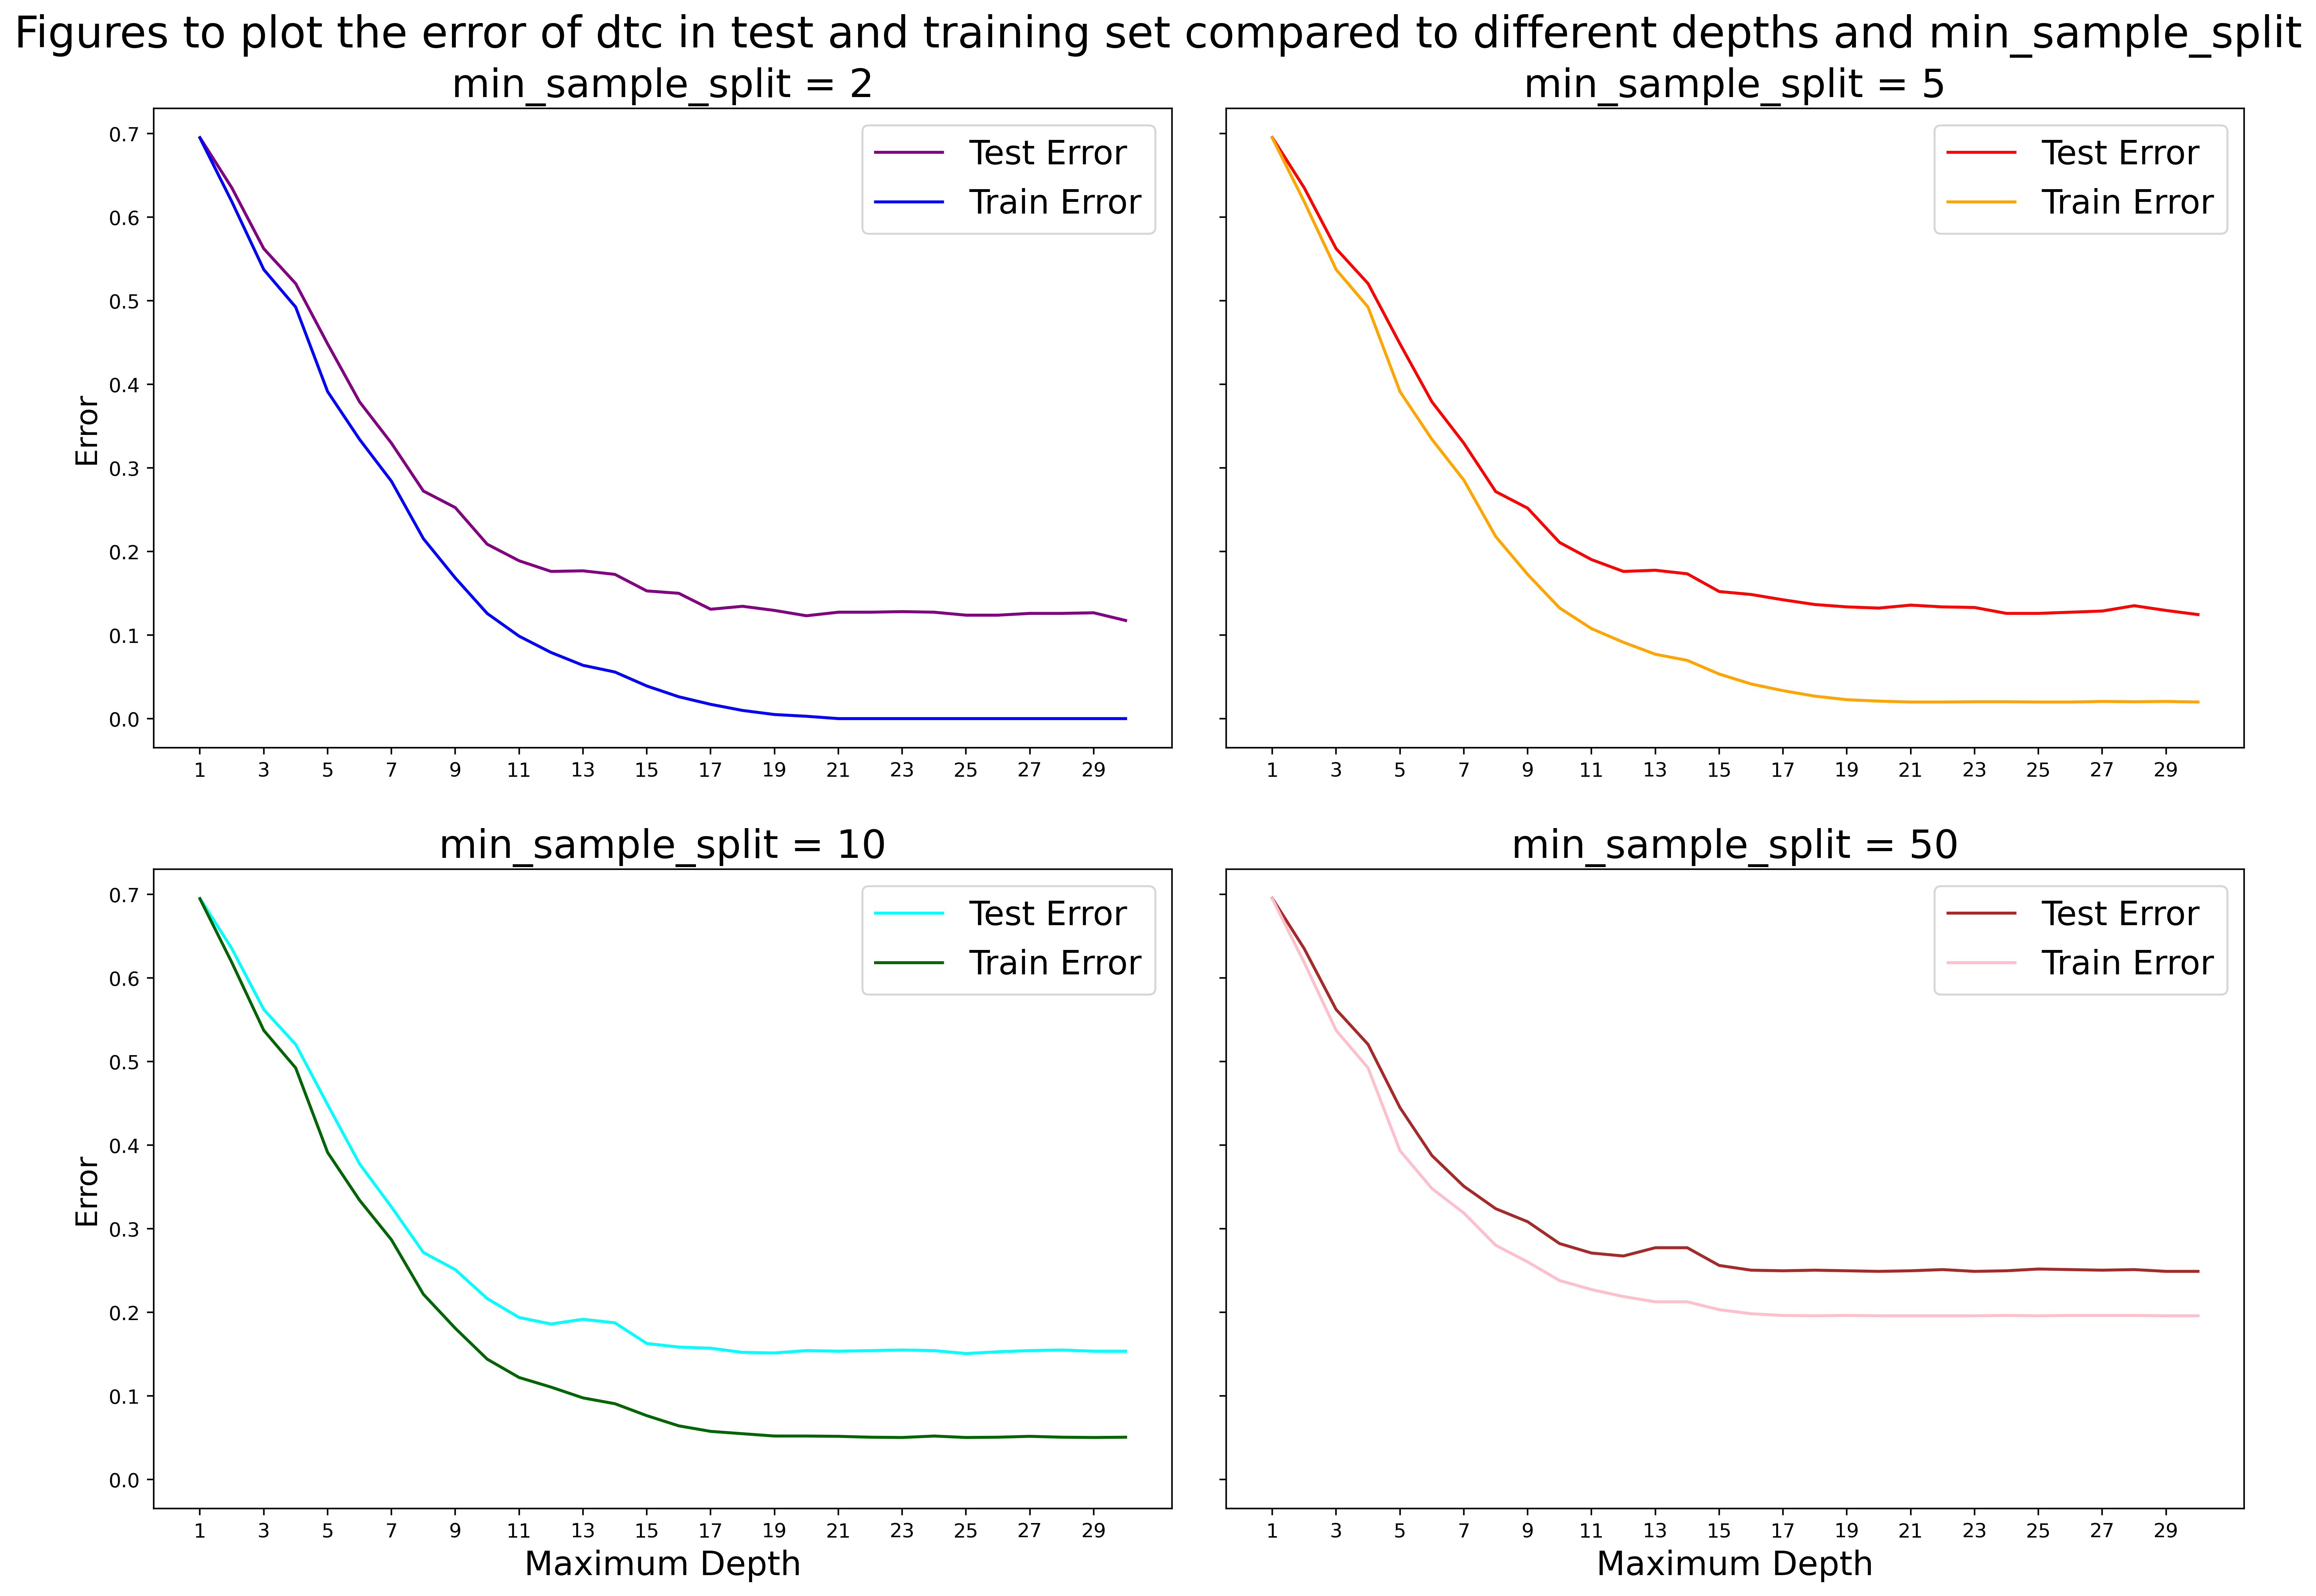

These 4 figures show the different test error and train error, regarding different dtc depths and different min_sample_sizes


In [5]:
### Create Plots to compare error of different depths and diferent min_sample_size

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

depth = np.arange(1,31,1)

fig, axes = plt.subplots(2,2, sharey=True, figsize=(16,12) )
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Figures to plot the error of dtc in test and training set compared to different depths and min_sample_split", fontsize=22, y=0.95)

# Figure to plot the error of dtc in test and training 
figure = plt.subplot(2,2,1)
plt.plot(depth, list_test_err, label= 'Test Error', color='purple')
plt.plot(depth, list_train_err, label= 'Train Error', color='blue')
plt.ylabel('Error', fontsize= 15)
figure.set_title('min_sample_split = 2', fontsize= 20)
plt.xticks(depth[::2])
plt.legend(fontsize=17)

# Figure to plot the error of dtc in test and training 
figure = plt.subplot(2,2,2)
plt.plot(depth, list_test_err_5, label= 'Test Error', color='red')
plt.plot(depth, list_train_err_5, label= 'Train Error', color='orange')
plt.xticks(depth[::2])
figure.set_title('min_sample_split = 5', fontsize= 20)
plt.legend(fontsize=17)

# Figure to plot the error of dtc in test and training 
figure = plt.subplot(2,2,3)
plt.plot(depth, list_test_err_10, label= 'Test Error', color='cyan')
plt.plot(depth, list_train_err_10, label= 'Train Error', color='darkgreen')
plt.xlabel('Maximum Depth', fontsize=17)
plt.ylabel('Error', fontsize= 15)
plt.xticks(depth[::2])
figure.set_title('min_sample_split = 10', fontsize= 20)
plt.legend(fontsize=17)

# Figure to plot the error of dtc in test and training 
figure = plt.subplot(2,2,4)
plt.plot(depth, list_test_err_50, label= 'Test Error', color='brown')
plt.plot(depth, list_train_err_50, label= 'Train Error', color='pink')
plt.xlabel('Maximum Depth', fontsize=17)
plt.xticks(depth[::2])
figure.set_title('min_sample_split = 50', fontsize= 20)
plt.legend(fontsize=17)

plt.savefig('fig1_final')

plt.tight_layout(pad=2.4)
plt.show()


print('These 4 figures show the different test error and train error, regarding different dtc depths and different min_sample_sizes')

In [6]:
### Finding the minimum train and test error value, computation does not matter just take the best value

def finding_optimal_depth(test_err, train_err):
    min_test_error = min(test_err)
    min_test_error_index = np.argmin(test_err)
    optimal_depth = depth[min_test_error_index]
    corresponding_train_error = train_err[min_test_error_index]
    
    print(f"Test Error: {min_test_error}")
    print(f"Optimal Depth: {optimal_depth}")
    print(f"Corresponding Training Error: {corresponding_train_error}")


In [7]:
print('----------------------------------------------------')
print('This is the optimal dpeth with min_sample_size = 2')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err, list_train_err))
print('Conclusion: Train error of 0.0 gives room for concern of overfitting, but test error of 0.11 shows there is still room for improvement')

print('----------------------------------------------------')
print('This is the optimal dpeth with min_sample_size = 5')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err_5, list_train_err_5))
print('Conclusion:')

print('----------------------------------------------------')
print('This is the optimal dpeth with min_sample_size = 10')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err_10, list_train_err_10))
print('Conclusion: ')

print('----------------------------------------------------')
print('This is the optimath with min_sample_size = 50')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err_50, list_train_err_50))
print('Conclusion: ')

----------------------------------------------------
This is the optimal dpeth with min_sample_size = 2
----------------------------------------------------
Test Error: 0.11739745403111734
Optimal Depth: 30
Corresponding Training Error: 0.0
None
Conclusion: Train error of 0.0 gives room for concern of overfitting, but test error of 0.11 shows there is still room for improvement
----------------------------------------------------
This is the optimal dpeth with min_sample_size = 5
----------------------------------------------------
Test Error: 0.12446958981612444
Optimal Depth: 30
Corresponding Training Error: 0.01986062717770032
None
Conclusion:
----------------------------------------------------
This is the optimal dpeth with min_sample_size = 10
----------------------------------------------------
Test Error: 0.15063649222065068
Optimal Depth: 25
Corresponding Training Error: 0.05017421602787453
None
Conclusion: 
----------------------------------------------------
This is the opti

In [8]:
### Fitting the optimal dtc with training_test_split and find out the accuracy
# Does it make sense to do?

from sklearn import tree
import matplotlib.pyplot as plt

dtc  = tree.DecisionTreeClassifier(max_depth = 22, min_samples_split=2)
dtc = dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)

correct_ones = 0


for k in range(len(y_test)):
    if(y_test[k] == predictions[k]):
        correct_ones = correct_ones+1
        
accuracy = correct_ones / len(y_test)

print(accuracy)

0.8748231966053748


In [9]:
def AverageList(lst): 
    return sum(lst) / len(lst)

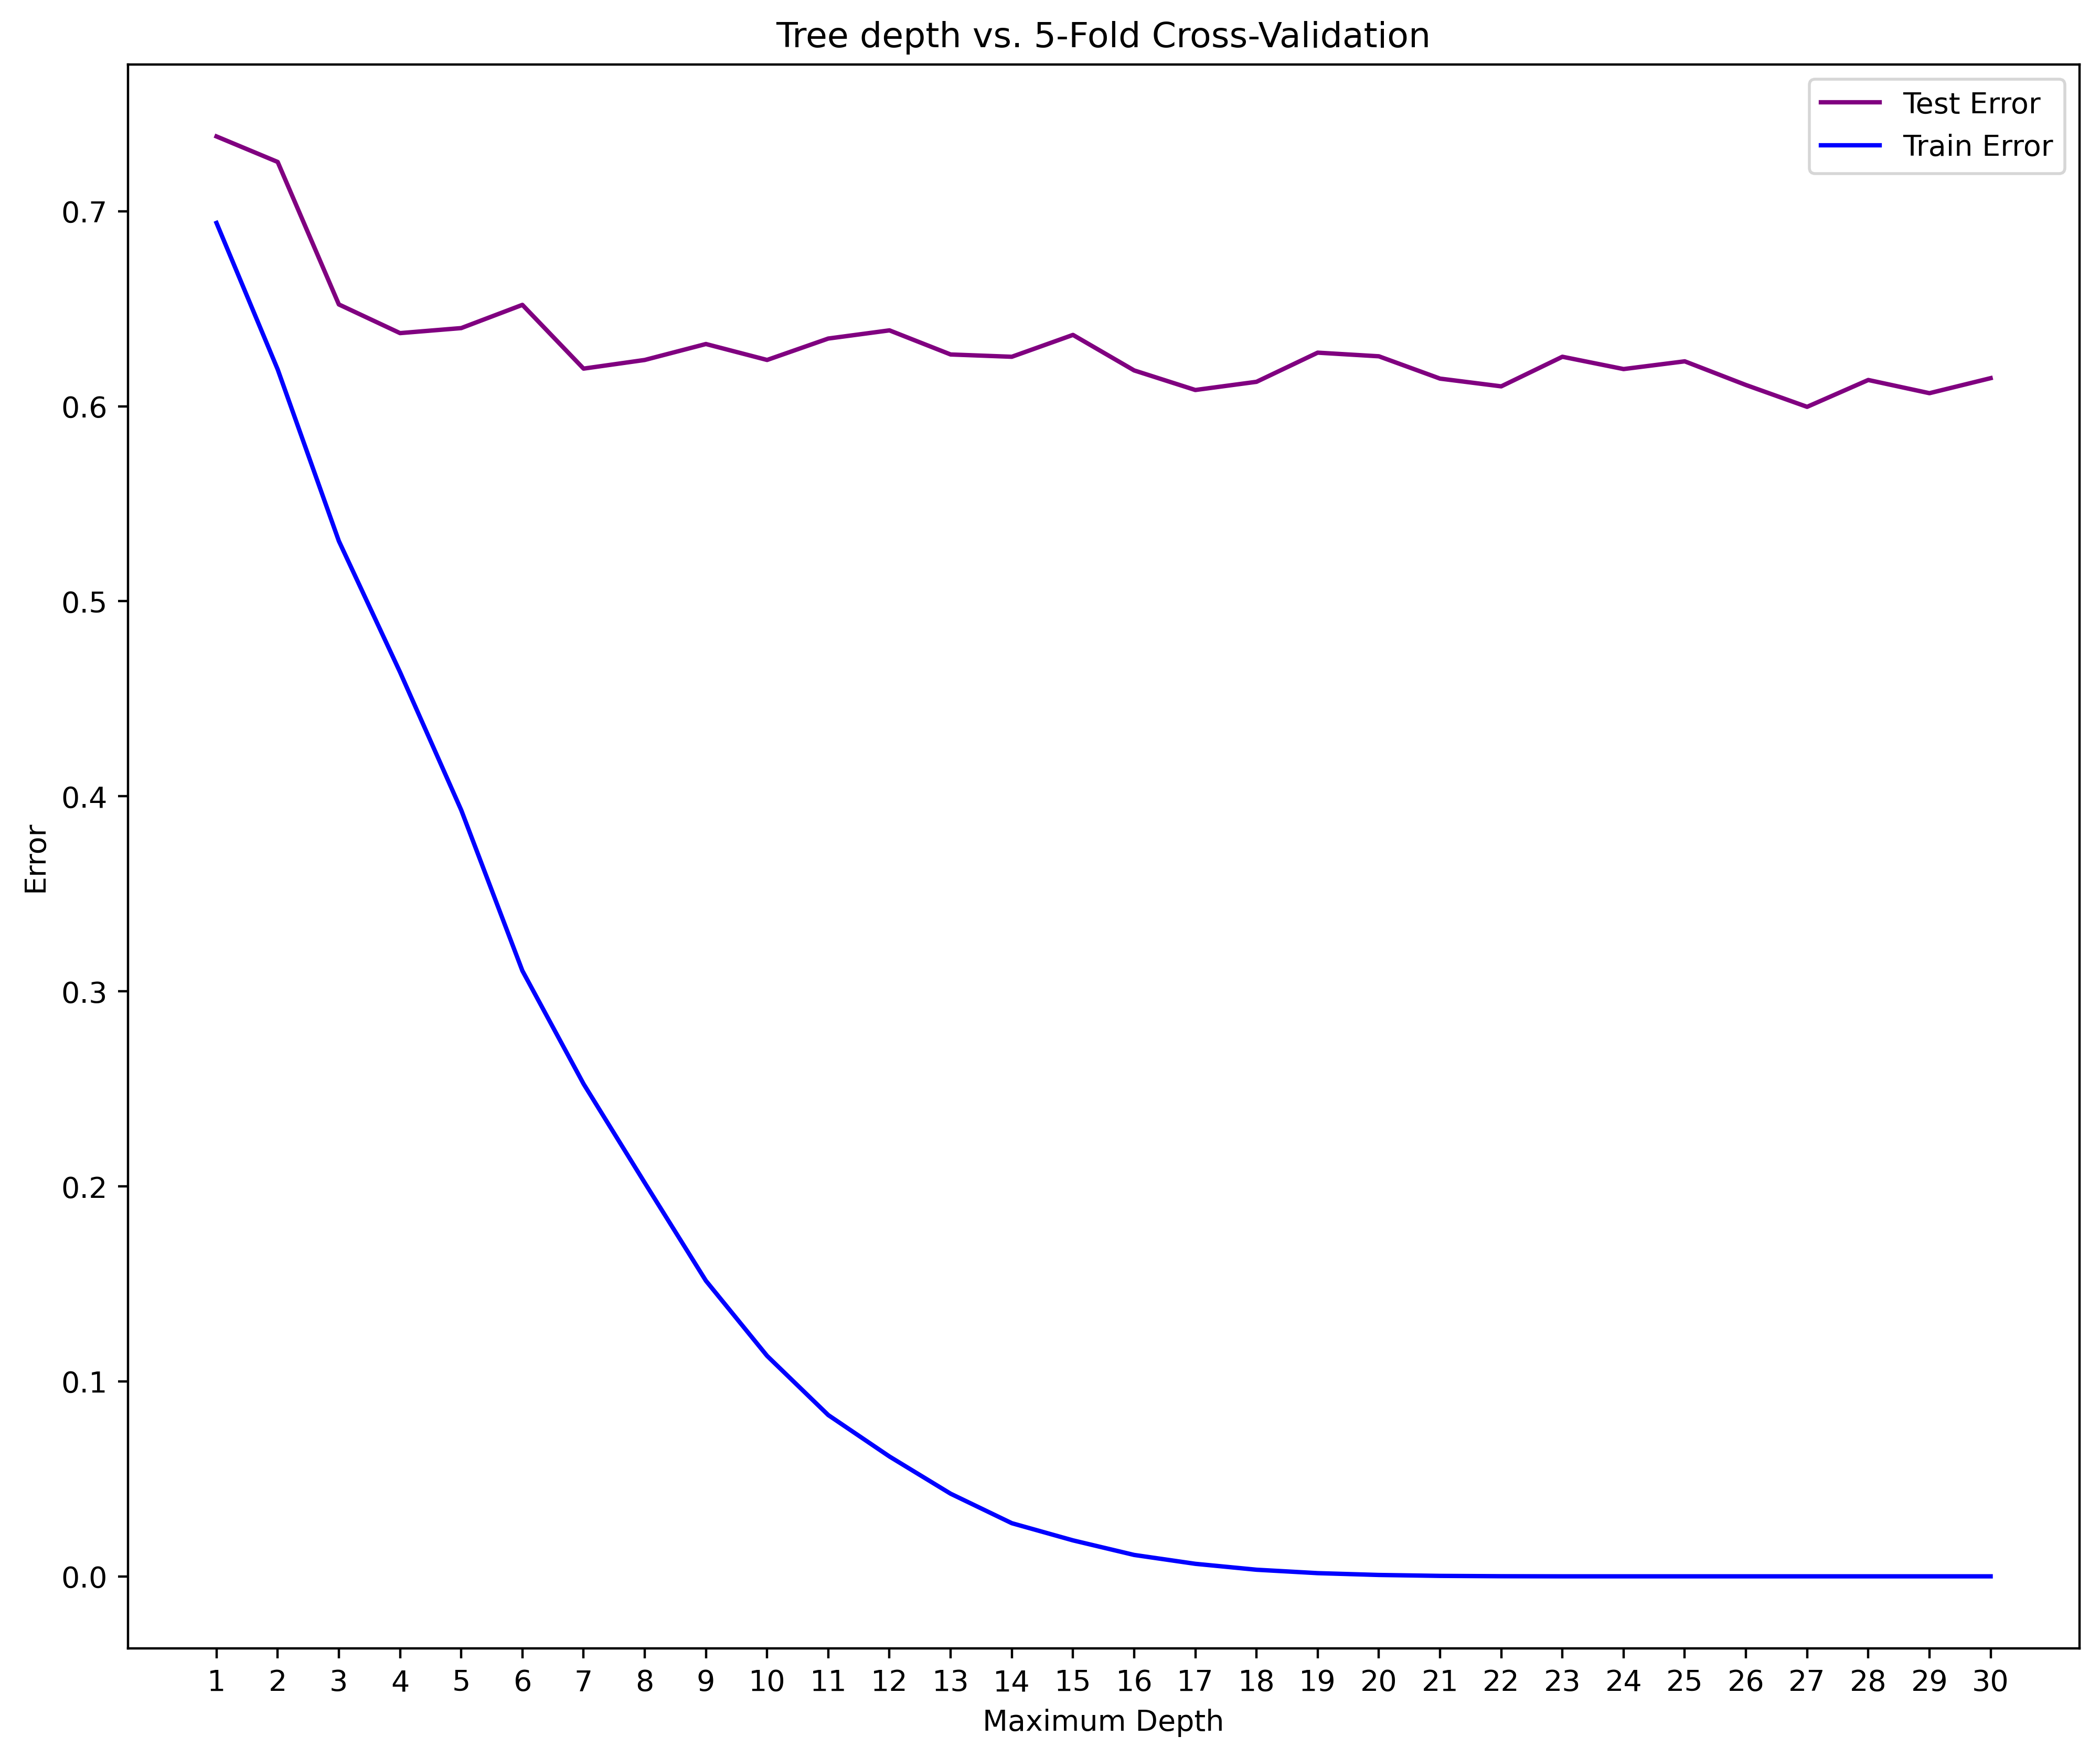

This figure show the error in the test set and in the training set compared to the maximum depth of the decision tree
----------------------------------------------------
This is the optimal depth with stratified 5-fold cross-validation 
----------------------------------------------------
Test Error: 0.5996728426700401
Optimal Depth: 27
Corresponding Training Error: 0.0
None
Conclusion:


In [11]:
## stratified 5-fold cross-validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(X, y_final)

list_test_err_final = []
list_train_err_final = []

curr_depth = 0

for i in range(30):

    curr_depth = curr_depth+1
    list_test_err_curr = []
    list_train_err_curr = []
    
    for train, test in skf.split(X, y_final):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y_final[train], y_final[test]
        
        #Create decision tree object
        dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth)

        #Fit the decision tree to the training data, is correct only training data?
        dtc = dtc.fit(X_train, y_train)

        y_test_pred = dtc.predict(X_test)
        y_train_pred = dtc.predict(X_train)

        list_train_err_curr.append(1-accuracy_score(y_train, y_train_pred))

        list_test_err_curr.append(1-accuracy_score(y_test, y_test_pred))
        
    list_test_err_final.append(AverageList(list_test_err_curr))
    list_train_err_final.append(AverageList(list_train_err_curr))
    
# Figure to plot the error of dtc in test and training 
figure = plt.figure(figsize=(12,10))
plt.plot(np.arange(1,31,1), list_test_err_final, label= 'Test Error', color='purple')
plt.plot(np.arange(1,31,1), list_train_err_final, label= 'Train Error', color='blue')
plt.title("Tree depth vs. 5-Fold Cross-Validation")
plt.xlabel('Maximum Depth')
plt.ylabel('Error')
plt.xticks(depth)
plt.legend()
plt.savefig('fig_5Fold')
plt.show()
print('This figure show the error in the test set and in the training set compared to the maximum depth of the decision tree')

print('----------------------------------------------------')
print('This is the optimal depth with stratified 5-fold cross-validation ')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err_final, list_train_err_final))
print('Conclusion:')

In [11]:
dtc  = tree.DecisionTreeClassifier(max_depth = 17, min_samples_split=2)
dtc = dtc.fit(X, y_final)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y_final)

predictions = dtc.predict(X)

correct_ones = 0

for k in range(len(y_test)):
    if(y_test[k] == predictions[k]): 
        correct_ones = correct_ones+1
        
accuracy = correct_ones / len(y_test)

print(accuracy)

0.12967289719626168


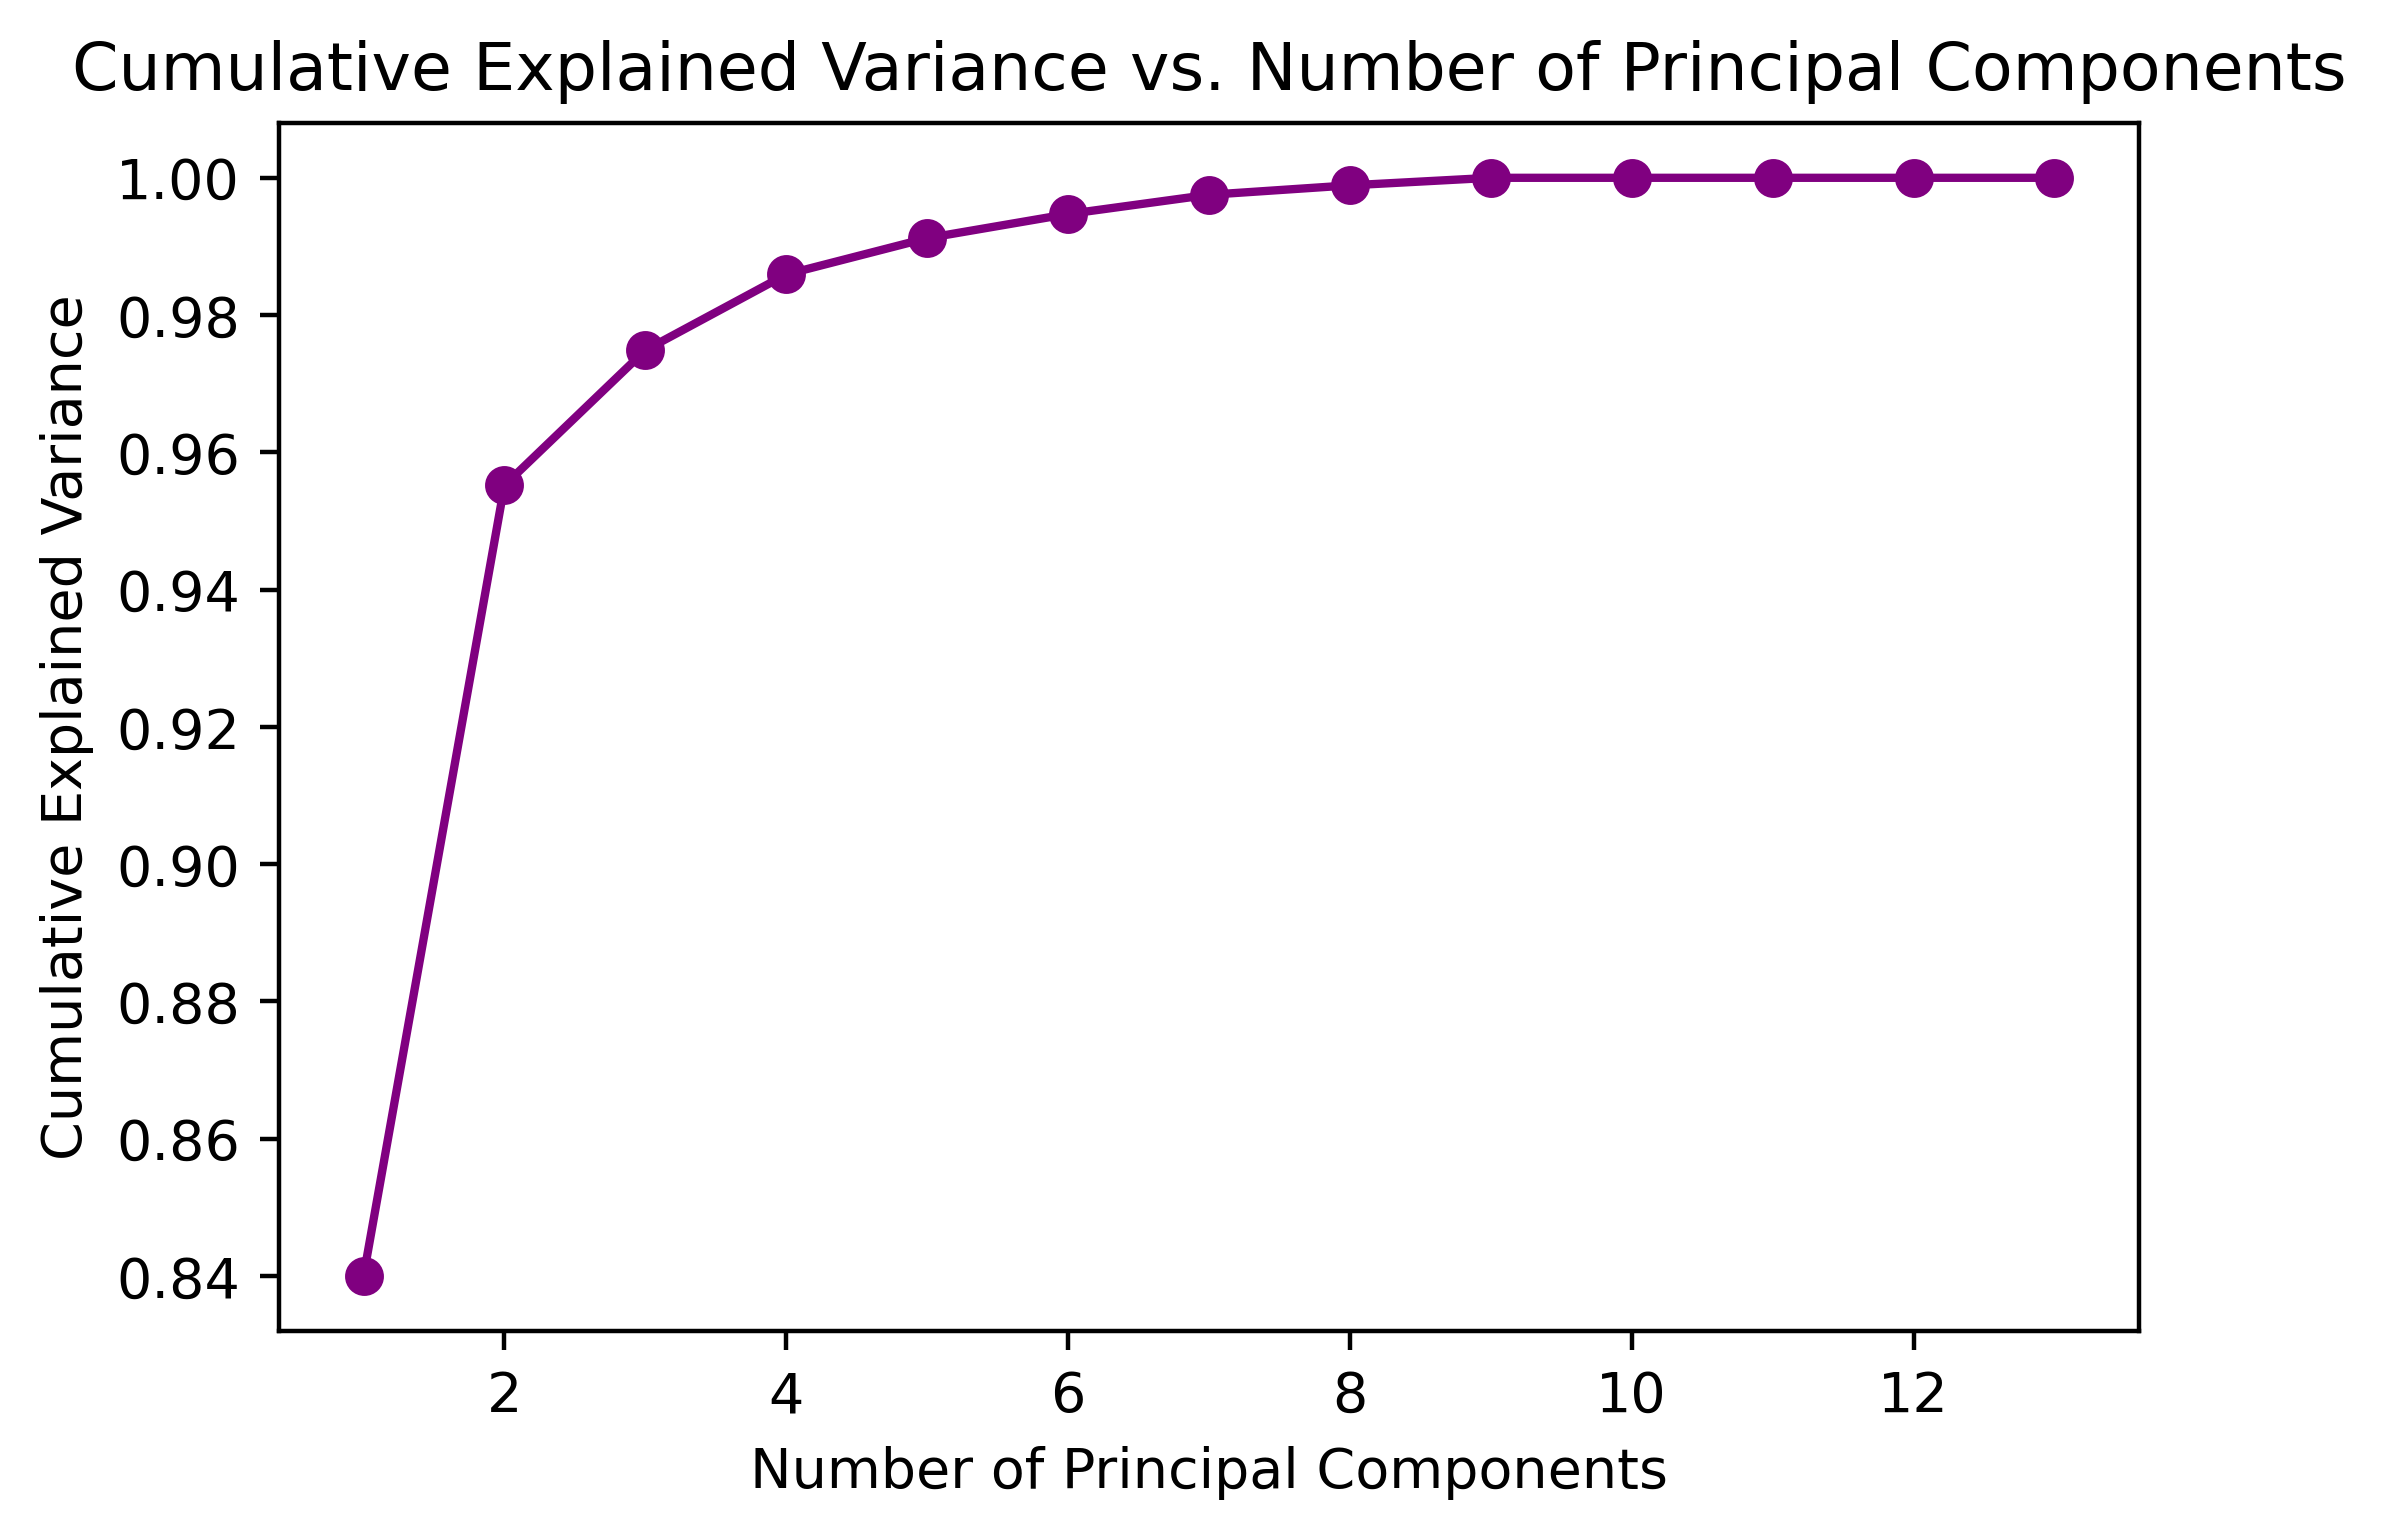

In [12]:
### Now apply pca to find the best fitting 

from sklearn.decomposition import PCA

#mean centre data
mu = np.mean(X,axis=0)

std = np.std(X, axis=0)
X_standardized = (X - mu) / std

# train_test split
random_state = 13
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_final, test_size=0.3, 
                                                    random_state= random_state, stratify=y_final)
# Create a PCA instance and fit the data
pca = PCA()
pca.fit(X_train)

# Get the principal components
components = pca.components_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='purple')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.savefig('fig_cumulative_explained_variance')
plt.show()


In [13]:
cumulative_explained_variance[9]

0.9999999999999889

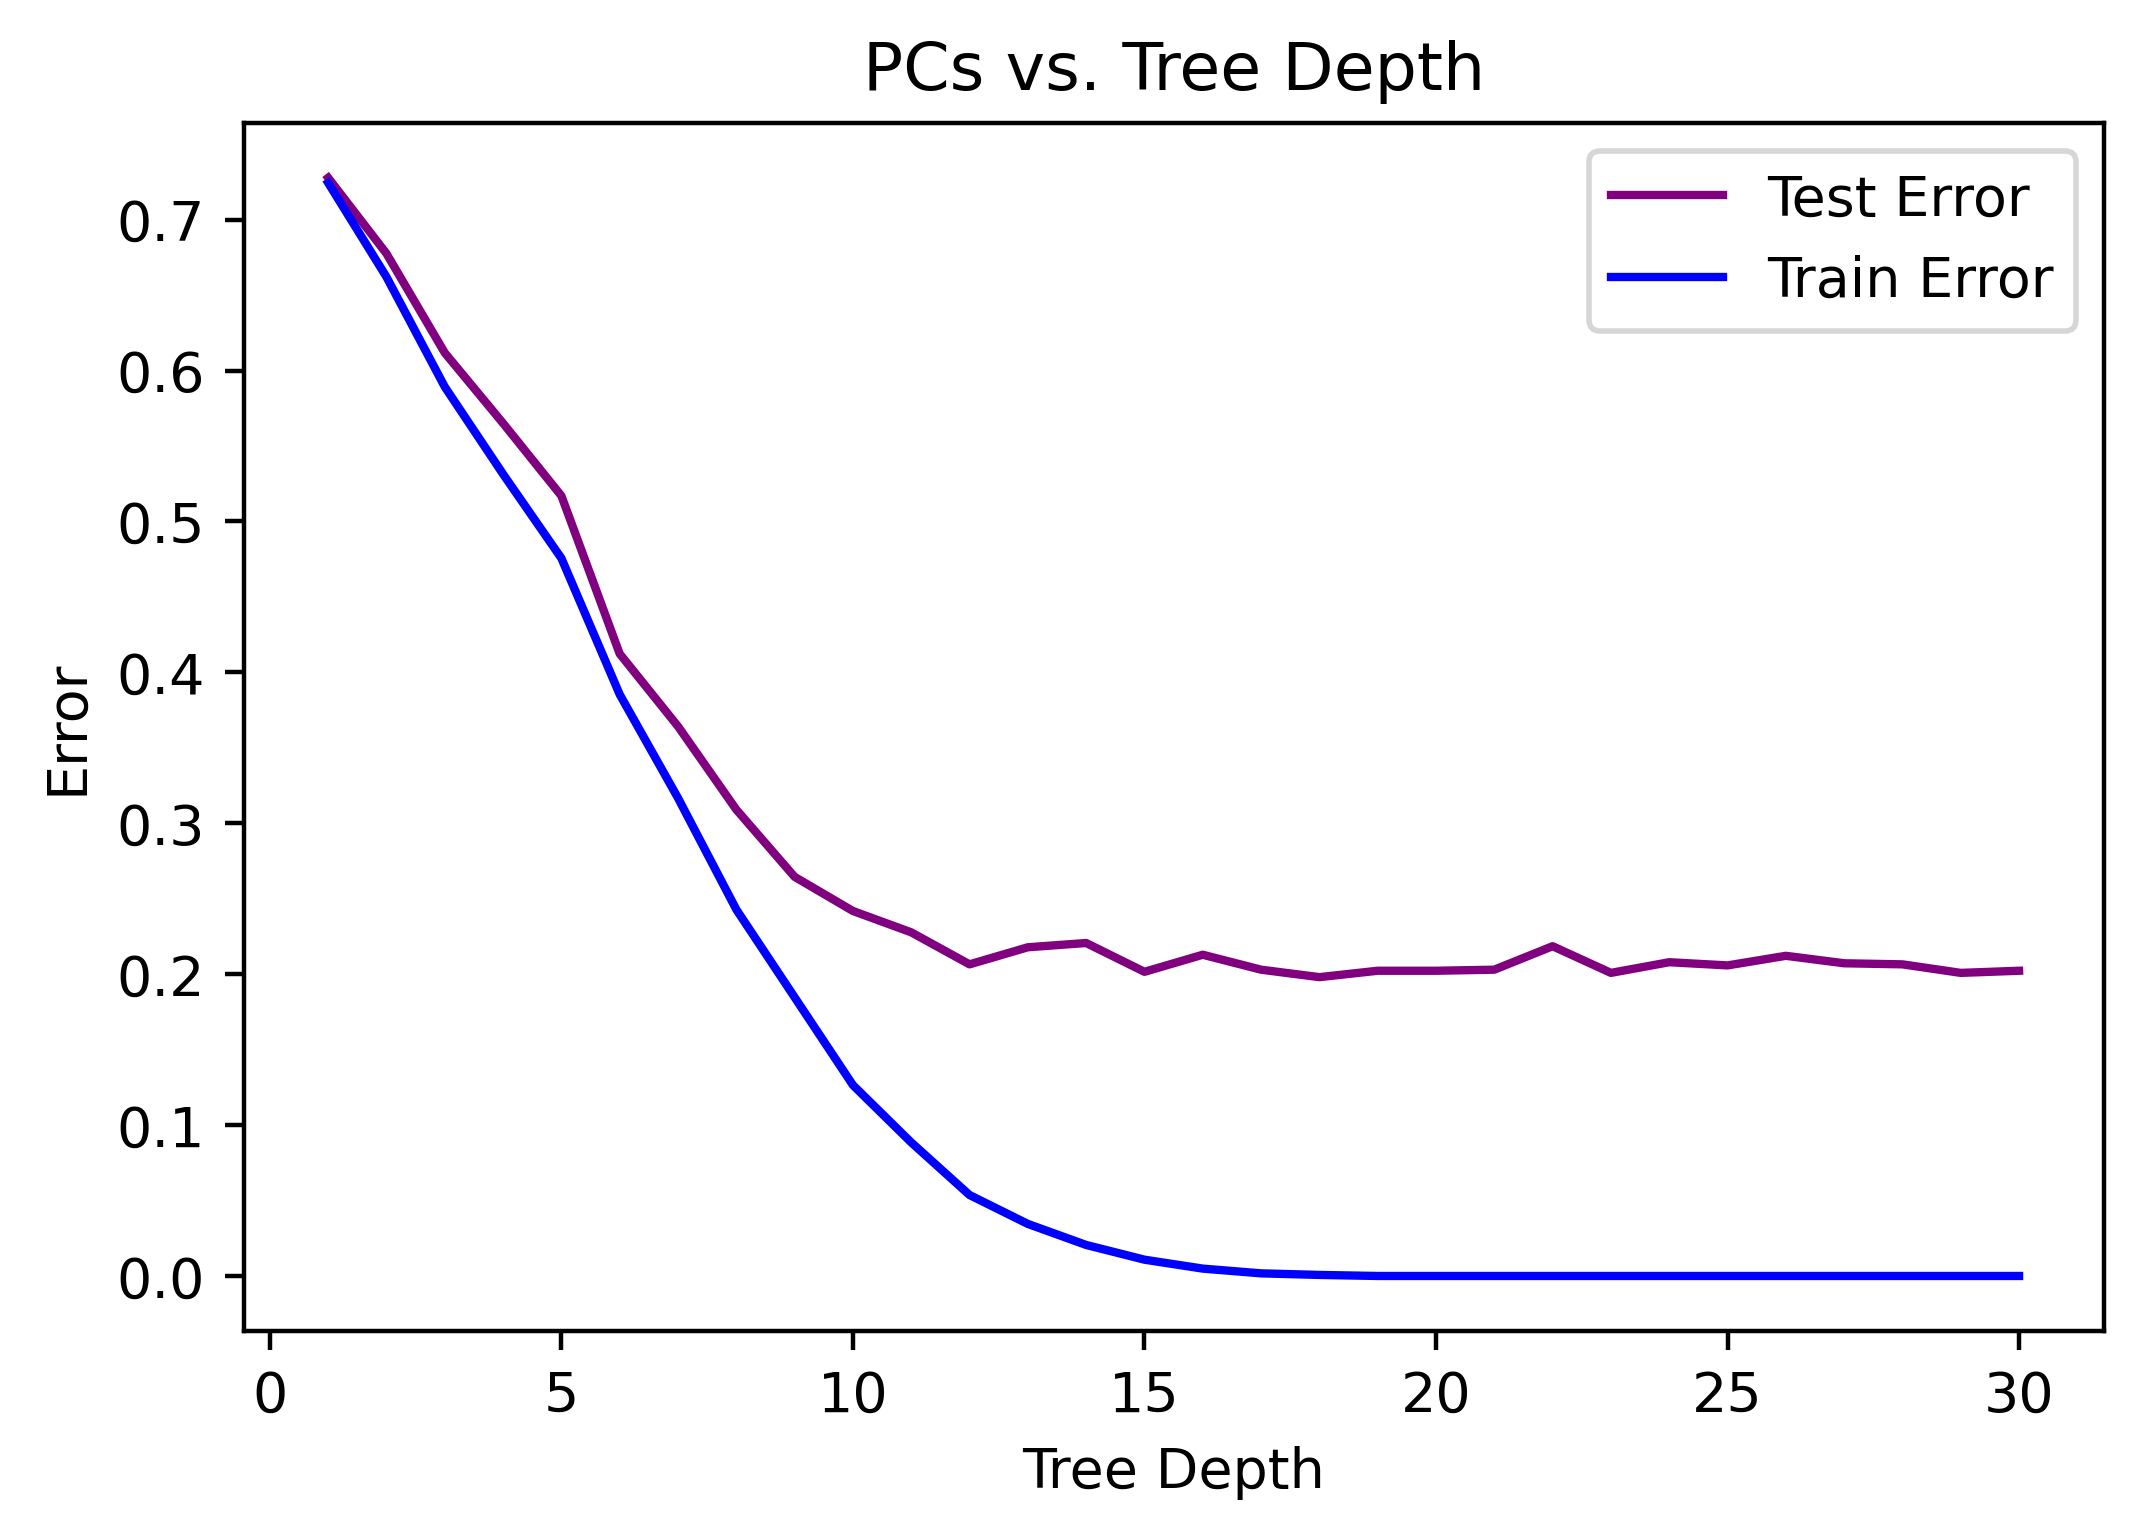

----------------------------------------------------
This is the optimal depth for the first two PCs
----------------------------------------------------
Test Error: 0.19801980198019797
Optimal Depth: 18
Corresponding Training Error: 0.0006968641114982743
None
Conclusion:


In [15]:
# Choose the number of components based on the plot or a desired explained variance threshold
n_components = 6  # Set the desired number of components

# Transform the data to the selected number of components
X_pca = pca.transform(X_standardized)[:, :n_components]

list_test_err_pca = []
list_train_err_pca = []

curr_depth = 0

# fit new dtc but only with the 2 firtst PCs since they represent 96% of the data
random_state = 1337
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_final, test_size=0.33, 
                                                    random_state= random_state, stratify=y_final)
        
for i in range(30):
    
    curr_depth = curr_depth+1

    #Create decision tree object
    dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth)

    #Fit the decision tree to the training data, is correct only training data?
    dtc = dtc.fit(X_train, y_train)

    y_test_pred = dtc.predict(X_test)
    y_train_pred = dtc.predict(X_train)
    
    list_train_err_pca.append(1-accuracy_score(y_train, y_train_pred))
    
    list_test_err_pca.append(1-accuracy_score(y_test, y_test_pred))
    

# Figure to plot the error of dtc in test and training 
figure2 = plt.figure()
plt.plot(depth, list_test_err_pca, label= 'Test Error', color='purple')
plt.plot(depth, list_train_err_pca, label= 'Train Error', color='blue')
plt.ylabel('Error')
plt.xlabel('Tree Depth')
plt.title('PCs vs. Tree Depth')
plt.legend()
plt.show()

print('----------------------------------------------------')
print('This is the optimal depth for the first two PCs')
print('----------------------------------------------------')
print(finding_optimal_depth(list_test_err_pca, list_train_err_pca))
print('Conclusion:')

In [16]:
dtc  = tree.DecisionTreeClassifier(max_depth = 16, min_samples_split=2)
dtc = dtc.fit(X_train, y_train)

predictions = dtc.predict(X_test)

correct_ones = 0

for k in range(len(y_test)):
    if(y_test[k] == predictions[k]):
        correct_ones = correct_ones + 1
        
accuracy = correct_ones / len(y_test)

print(accuracy)

0.7927864214992928


----------------------------------------------------
This is the optimal depth for the first two PCs
----------------------------------------------------
Test Error: 0.5551626591230552
Optimal Depth: 10
Corresponding Training Error: 0.3285714285714286
None
Conclusion:
----------------------------------------------------
This is the optimal depth for the first two PCs
----------------------------------------------------
Test Error: 0.2623762376237624
Optimal Depth: 28
Corresponding Training Error: 0.0
None
Conclusion:
----------------------------------------------------
This is the optimal depth for the first two PCs
----------------------------------------------------
Test Error: 0.18528995756718525
Optimal Depth: 16
Corresponding Training Error: 0.00034843205574908165
None
Conclusion:
----------------------------------------------------
This is the optimal depth for the first two PCs
----------------------------------------------------
Test Error: 0.1874115983026874
Optimal Depth: 22


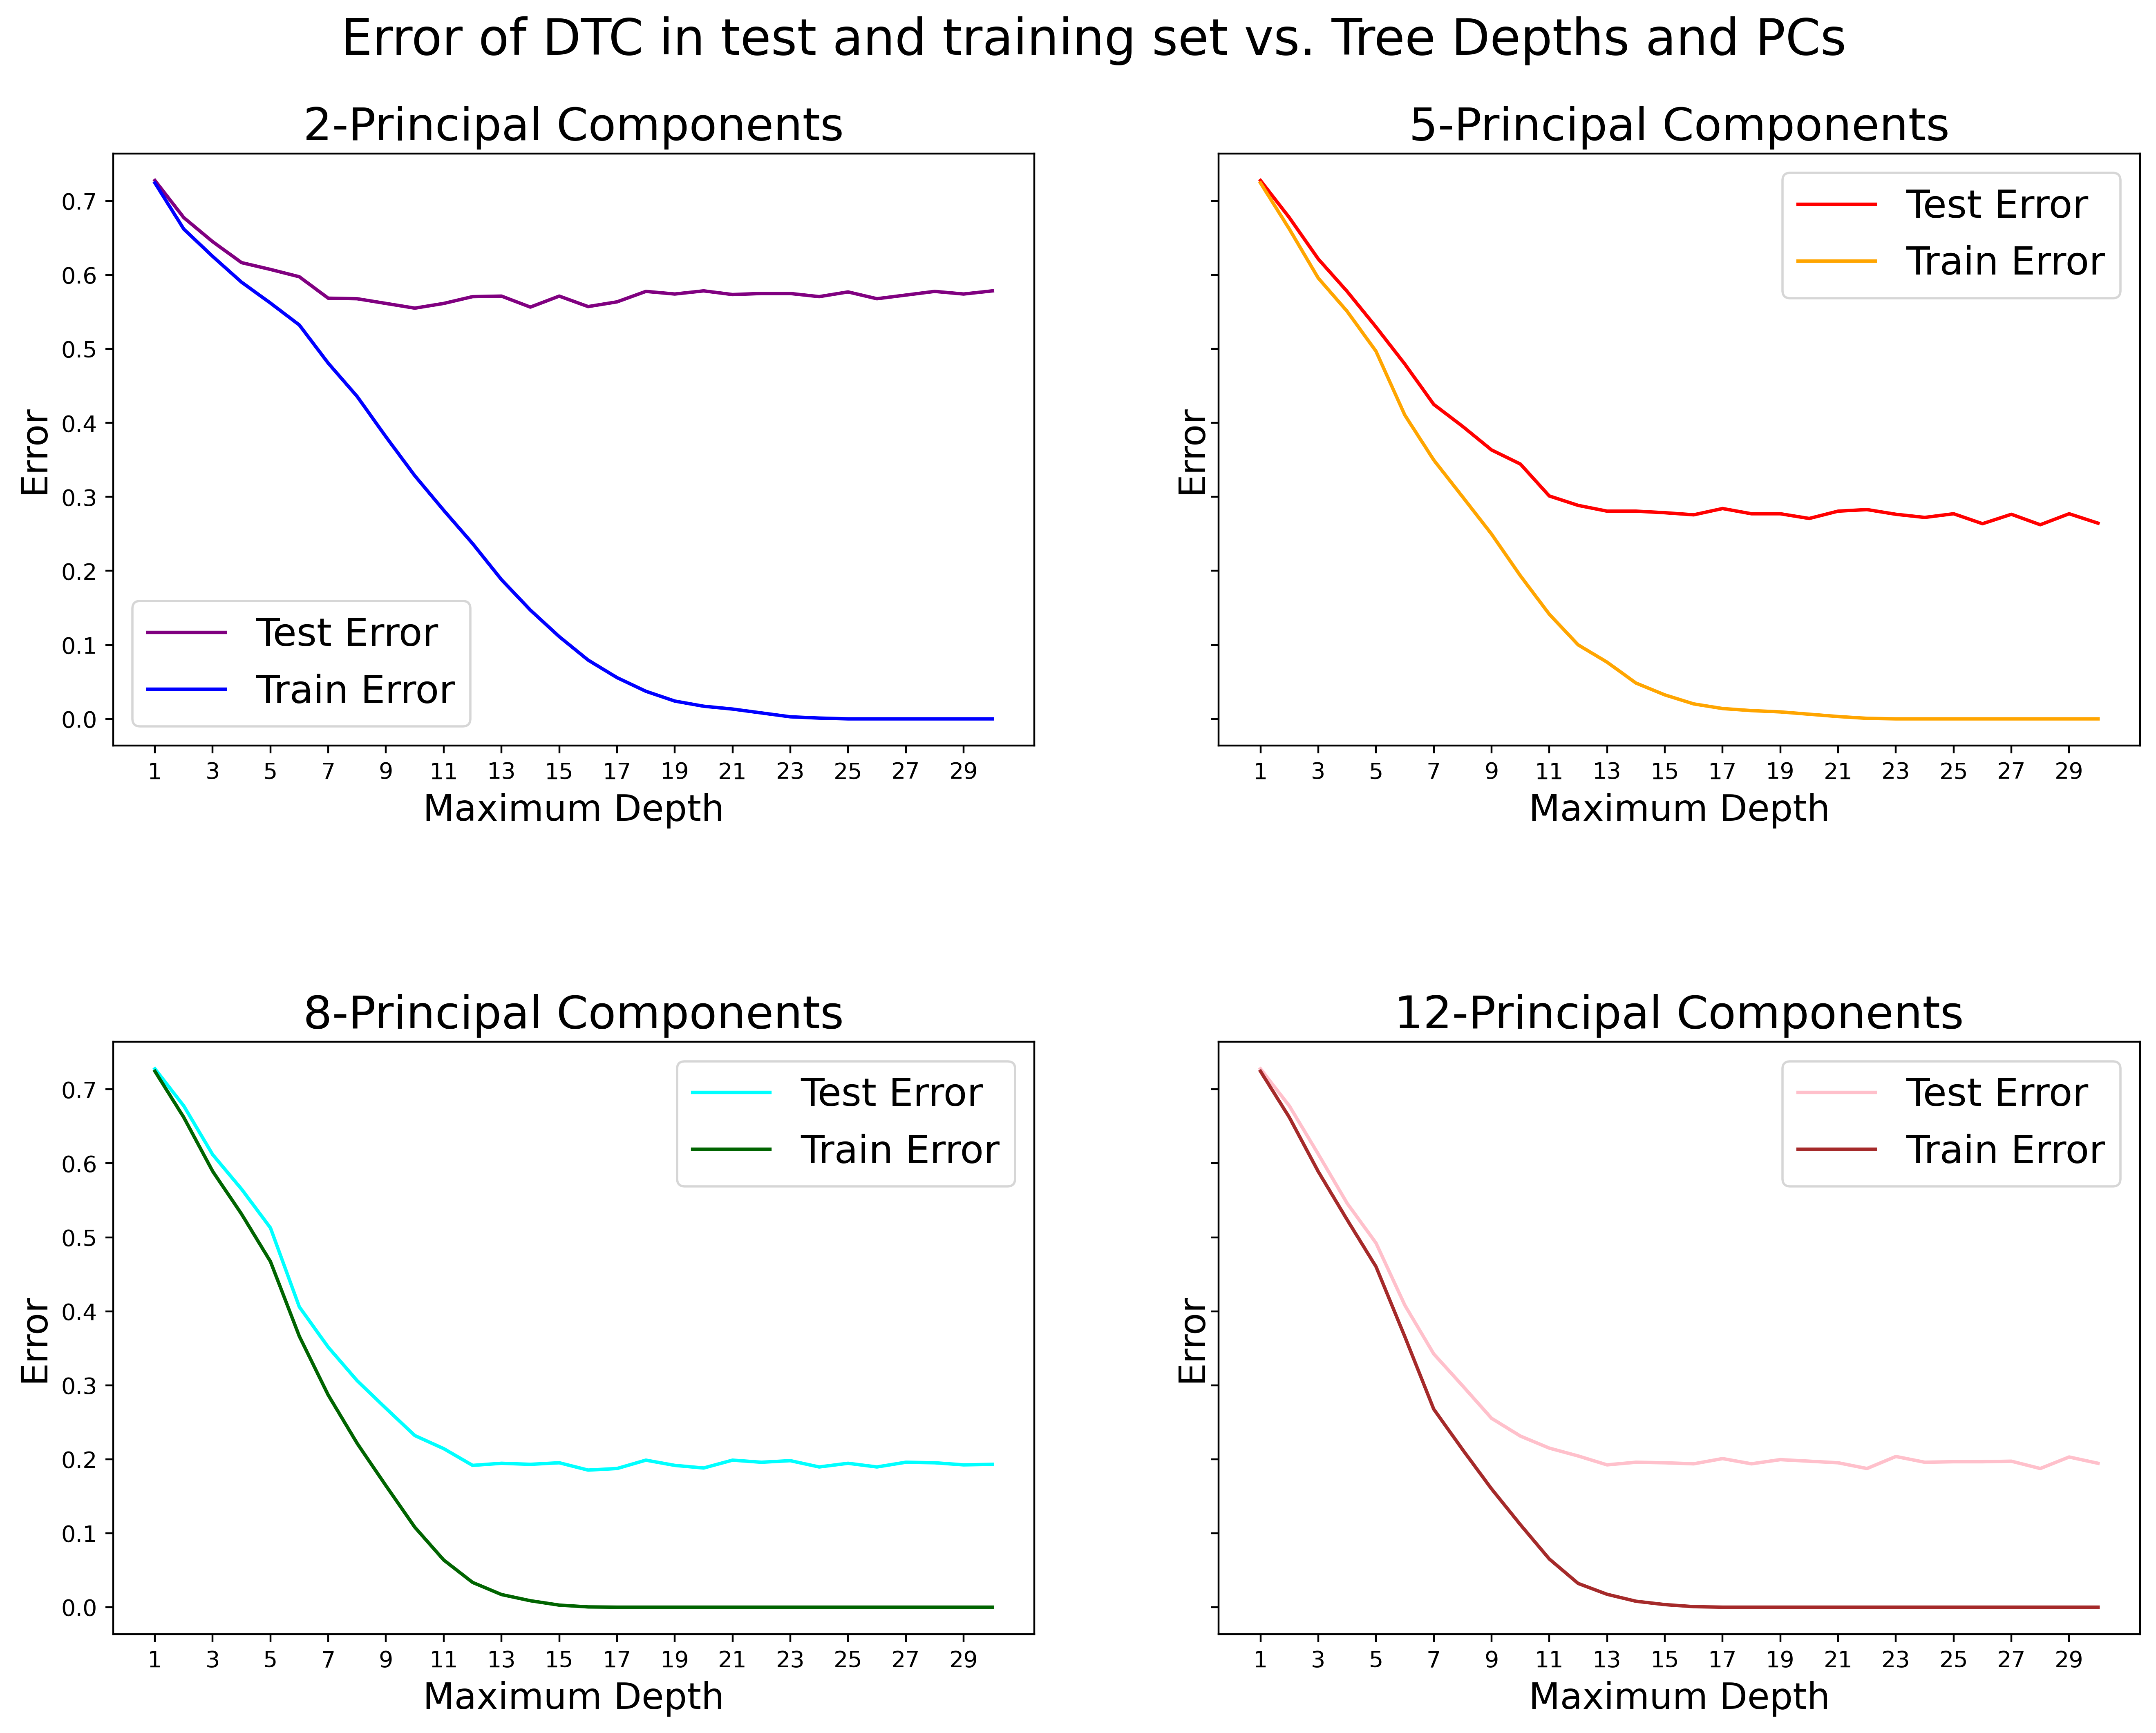

In [19]:
### make plots of different dtcs with PCA. Compare different amounts ofPCs and different depths

fig, axes = plt.subplots(2,2, sharey=True, figsize=(16,12) )
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Error of DTC in test and training set vs. Tree Depths and PCs", fontsize=22, y=0.95)

n_components_list = [2,5,8,12]

colors_ = ['purple', 'blue', 'red', 'orange', 'cyan', 'darkgreen','pink', 'brown']
color_nr = 0

for i in range(len(n_components_list)):
    
    n_components = n_components_list[i]
    
    # Transform the data to the selected number of components
    X_pca = pca.transform(X_standardized)[:, :n_components]

    list_test_err_pca = []
    list_train_err_pca = []

    curr_depth = 0

    # fit new dtc but only with the i first PCs
    random_state = 1337
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_final, test_size=0.33, 
                                                        random_state= random_state, stratify=y_final)
    
    for j in range(30):
    
        curr_depth = curr_depth+1

        #Create decision tree object
        dtc  = tree.DecisionTreeClassifier(max_depth = curr_depth)

        #Fit the decision tree to the training data, is correct only training data?
        dtc = dtc.fit(X_train, y_train)

        y_test_pred = dtc.predict(X_test)
        y_train_pred = dtc.predict(X_train)

        list_train_err_pca.append(1-accuracy_score(y_train, y_train_pred))

        list_test_err_pca.append(1-accuracy_score(y_test, y_test_pred))
    
    # Figure to plot the error of dtc in test and training 
    figure = plt.subplot(2,2,i+1)
    plt.plot(depth, list_test_err_pca, label= 'Test Error', color=colors_[color_nr])
    plt.plot(depth, list_train_err_pca, label= 'Train Error', color=colors_[color_nr+1])
    plt.ylabel('Error', fontsize= 16)
    plt.xlabel('Maximum Depth', fontsize=16)
    figure.set_title('{}-Principal Components'.format(n_components), fontsize= 20)
    plt.xticks(depth[::2])
    plt.legend(fontsize=17)
    
    color_nr = color_nr+2
    
    print('----------------------------------------------------')
    print('This is the optimal depth for the first PCs')
    print('----------------------------------------------------')
    print(finding_optimal_depth(list_test_err_pca, list_train_err_pca))
    print('Conclusion:')

plt.savefig('fig_PCA')
plt.show()